In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import motiflets.motiflets as mtfls
import motiflets.plotting as mtfls_plt
from tests.audio.lyrics import *
import motiflets_uni.motiflets as mtfls_uni
from motiflets_uni.plotting import Motiflets as Motiflets_uni
from sklearn.decomposition import PCA
import tests.amc.amc_parser as amc_parser
import time

/home/niyaz/Programme/miniconda3/envs/ubuntu-motiflets-mv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
k_max = 16
motif_length = 100
n_dims_rest = 25
n_dims_rest2 = 17

def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict


def exclude_body_joints(df):
    # Filter body joints as suggested by Yeh
    exclude = ['root', 'lowerback', 'upperback',
               'thorax', 'lowerneck', 'upperneck', 'head']
    exclude_bones = []
    exclude_bones.extend([x + "_" + k for x in exclude for k in 'xyz'])
    exclude_bones

    return df[~df.index.isin(exclude_bones)]


def include_joints(df, include, add_xyz=True):
    include_bones = []

    if add_xyz:
        include_bones.extend([x + "_" + k for x in include for k in 'xyz'])
    else:
        include_bones = include

    return df[df.index.isin(include_bones)]

amc_name = "13_17" #"Boxing Motions"
asf_path = "datasets/motion_data/13.asf"
amc_path = 'datasets/motion_data/' + amc_name + '.amc'

joints_to_use = ['rclavicle', 'rhumerus', 'rradius', 'rwrist',
             'rhand', 'rfingers', 'rthumb',
             'rfemur', 'rtibia', 'rfoot', 'rtoes']
add_xyz=True

joints = amc_parser.parse_asf(asf_path)
motions = amc_parser.parse_amc(amc_path)

df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions]).T
#df = exclude_body_joints(df)
print(df)
#df = include_joints(df, joints_to_use, add_xyz=add_xyz)
#print(df)
# print("Used joints:", joints_to_use)
# series = df.values
# print(f'DatensatzLänge: {series.shape[1]}')
# print(series.shape)


                  0          1          2          3          4          5     \
root_x        4.101890   4.113940   4.127430   4.144050   4.162250   4.184910   
root_y       17.518100  17.511900  17.508500  17.511000  17.523500  17.545900   
root_z       -3.866450  -3.837700  -3.807390  -3.776730  -3.745170  -3.713820   
lhipjoint_x   5.076812   5.078488   5.081993   5.091242   5.100829   5.108174   
lhipjoint_y  15.723790  15.721240  15.722408  15.728400  15.745231  15.768951   
...                ...        ...        ...        ...        ...        ...   
rfingers_y   19.180022  19.151890  19.157544  19.143299  19.170816  19.227377   
rfingers_z   -0.898867  -0.871628  -0.826570  -0.789275  -0.736242  -0.675225   
rthumb_x     -1.511833  -1.539144  -1.557586  -1.567575  -1.575803  -1.588518   
rthumb_y     18.997490  18.966512  18.970557  18.957488  18.987696  19.048148   
rthumb_z     -1.035693  -1.010968  -0.968368  -0.935545  -0.886563  -0.828951   

                  6        

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839
root_x,4.101890,4.113940,4.127430,4.144050,4.162250,4.184910,4.212740,4.246800,4.283220,4.321840,...,3.123840,3.120260,3.115410,3.109930,3.098230,3.083280,3.067160,3.047970,3.026730,3.021270
root_y,17.518100,17.511900,17.508500,17.511000,17.523500,17.545900,17.578300,17.617400,17.661600,17.714300,...,18.049200,18.033400,18.028000,18.008400,18.002400,18.003400,17.982100,17.970200,17.958800,17.933900
root_z,-3.866450,-3.837700,-3.807390,-3.776730,-3.745170,-3.713820,-3.682010,-3.651240,-3.622750,-3.600400,...,2.233030,2.221440,2.208870,2.194320,2.183890,2.169130,2.149930,2.134720,2.117680,2.068920
lhipjoint_x,5.076812,5.078488,5.081993,5.091242,5.100829,5.108174,5.114153,5.130153,5.153414,5.179609,...,3.679428,3.671955,3.664212,3.658433,3.647649,3.628316,3.612809,3.604777,3.585969,3.597515
lhipjoint_y,15.723790,15.721240,15.722408,15.728400,15.745231,15.768951,15.798417,15.836059,15.875761,15.923860,...,16.117418,16.098475,16.091668,16.072621,16.068259,16.065106,16.043453,16.044620,16.045258,16.021076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rfingers_y,19.180022,19.151890,19.157544,19.143299,19.170816,19.227377,19.304888,19.398792,19.510707,19.650317,...,16.232770,16.221772,16.213007,16.176278,16.145811,16.115346,16.058523,16.011370,15.968170,15.909221
rfingers_z,-0.898867,-0.871628,-0.826570,-0.789275,-0.736242,-0.675225,-0.620028,-0.573577,-0.546130,-0.530090,...,2.384309,2.431193,2.463875,2.484070,2.494958,2.523768,2.558104,2.570796,2.567300,2.569698
rthumb_x,-1.511833,-1.539144,-1.557586,-1.567575,-1.575803,-1.588518,-1.599427,-1.604078,-1.606104,-1.602007,...,-3.090298,-3.056835,-3.033258,-3.018629,-2.993478,-2.956358,-2.921780,-2.893915,-2.865257,-2.828118
rthumb_y,18.997490,18.966512,18.970557,18.957488,18.987696,19.048148,19.128635,19.222709,19.333191,19.470073,...,16.242674,16.233146,16.220056,16.180885,16.152152,16.128111,16.078009,16.033854,15.992288,15.935265


In [4]:
test_k = 15


df.shape[1] / 55

scale_n = np.arange(55*4, df.shape[1], 55)
times_list = []

for i, n in enumerate(scale_n):
    new_df = df.iloc[:, :n].values
    print(i)
    start = time.time()

    mtfls.runtime_test(test_k, df, motif_length)

    end = time.time()
    times_list.append(end-start)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


In [9]:
print(times_list)

print(len(scale_n))

[18.245550632476807, 18.271995067596436, 17.785602569580078, 19.845017433166504, 18.227693796157837, 18.200549364089966, 19.22121834754944, 19.036231756210327, 18.03497314453125, 18.447261095046997, 17.746079444885254, 17.706610441207886, 18.377613067626953, 18.54082727432251, 17.600146532058716, 18.33954381942749, 17.58598017692566, 18.467397928237915, 17.93826389312744, 18.86437964439392, 17.47040104866028, 18.10156011581421, 17.841532468795776, 18.14895987510681, 17.201342344284058, 18.033588886260986, 17.890804052352905, 19.55174970626831, 18.353972673416138, 18.063804149627686, 17.781280279159546, 18.135197639465332, 17.78478717803955, 18.401655197143555, 17.527496337890625, 18.271191358566284, 19.018007040023804, 17.198824167251587, 17.349724292755127, 17.40739345550537, 18.05991005897522, 19.250749349594116, 17.321977615356445, 16.969327449798584, 17.970231533050537, 18.632635354995728, 18.415987491607666, 18.813626050949097, 17.5810227394104, 18.064502716064453, 17.516988277435

/tmp/ipykernel_17844/1166375417.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


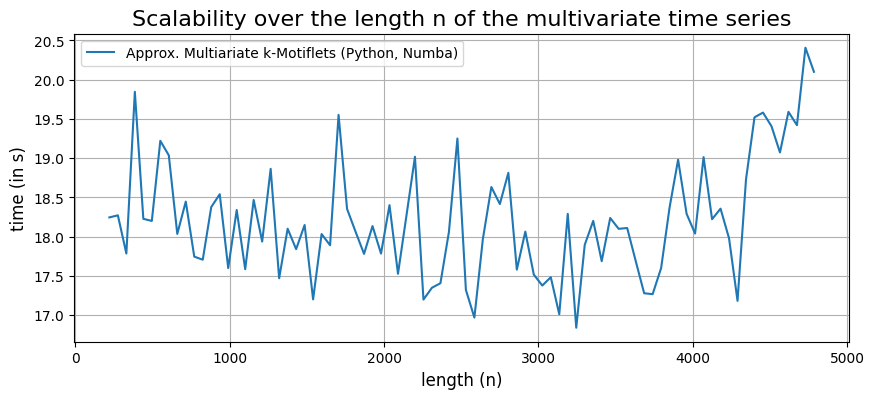

In [5]:
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scale_n = np.arange(55*4, df.shape[1], 55)
times_list = [18.245550632476807, 18.271995067596436, 17.785602569580078, 19.845017433166504, 18.227693796157837, 18.200549364089966, 19.22121834754944, 19.036231756210327, 18.03497314453125, 18.447261095046997, 17.746079444885254, 17.706610441207886, 18.377613067626953, 18.54082727432251, 17.600146532058716, 18.33954381942749, 17.58598017692566, 18.467397928237915, 17.93826389312744, 18.86437964439392, 17.47040104866028, 18.10156011581421, 17.841532468795776, 18.14895987510681, 17.201342344284058, 18.033588886260986, 17.890804052352905, 19.55174970626831, 18.353972673416138, 18.063804149627686, 17.781280279159546, 18.135197639465332, 17.78478717803955, 18.401655197143555, 17.527496337890625, 18.271191358566284, 19.018007040023804, 17.198824167251587, 17.349724292755127, 17.40739345550537, 18.05991005897522, 19.250749349594116, 17.321977615356445, 16.969327449798584, 17.970231533050537, 18.632635354995728, 18.415987491607666, 18.813626050949097, 17.5810227394104, 18.064502716064453, 17.516988277435303, 17.377660751342773, 17.483720064163208, 17.012173414230347, 18.29064440727234, 16.84046745300293, 17.896135091781616, 18.201359272003174, 17.687931060791016, 18.2381534576416, 18.10003924369812, 18.110429763793945, 17.692614555358887, 17.279491901397705, 17.26811408996582, 17.6003155708313, 18.37592649459839, 18.98068380355835, 18.291171073913574, 18.040034532546997, 19.013250827789307, 18.222733736038208, 18.356904983520508, 17.979264497756958, 17.182703256607056, 18.731192111968994, 19.520821809768677, 19.580686330795288, 19.406989097595215, 19.072855710983276, 19.590230226516724, 19.42067241668701, 20.40695548057556, 20.100103616714478]


plt.figure(figsize=(10,4))

ysmoothed = gaussian_filter1d(times_list, sigma=2)


plt.plot(scale_n, times_list, label="Approx. Multiariate k-Motiflets (Python, Numba)")
plt.title("Scalability over the length n of the multivariate time series", fontsize=16)
plt.ylabel('time (in s)', fontsize=12)
plt.xlabel('length (n)', fontsize=12)
plt.legend()
plt.grid()
plt.savefig("../../Latex/BachelorarbeitFinal/Images/scale_n/scale.pdf", bbox_inches='tight', dpi=600)
plt.show()